# Notebook sobre Regressões Avançadas e Agrupamento com Redes Neurais

## Introdução
Este notebook explora diferentes tipos de regressões e introduz o conceito de agrupamento utilizando redes neurais. Ele contém explicações teóricas e exemplos práticos dos seguintes tópicos:

1. **Regressão Polinomial**
2. **Regressão Spline**
3. **Regressão usando MLP (Multi-Layer Perceptron)**
4. **Agrupamento usando Redes Neurais**

---

## 1. Regressão Polinomial
A regressão polinomial é uma extensão da regressão linear que permite modelar relações não lineares entre a variável dependente e as variáveis independentes ao incluir termos polinomiais.

### Exemplo: Previsão com Regressão Polinomial

In [32]:
# instalação das bibliotecas
!pip install pandas numpy scikit-learn seaborn minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11705 sha256=d1411305d0c23a436fb05538d98bf1dc75c567d7b3c5a11f86a61324956627cc
  Stored in directory: /root/.cache/pip/wheels/c8/29/ba/ee521d9a6af783a1e1efb1831fe4afdf526613849b3f58175b
Successfully built minisom

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


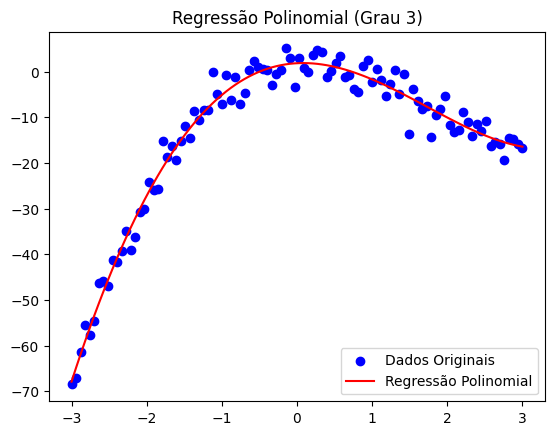

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Gerando dados não lineares
np.random.seed(42)
x = np.linspace(-3, 3, 100)
y = x**3 - 5*x**2 + 2 + np.random.normal(0, 3, size=len(x))
x = x[:, np.newaxis]

# Transformação polinomial (grau 3)
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)

# Ajustando o modelo de regressão
model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

# Visualização
plt.scatter(x, y, color='blue', label='Dados Originais')
plt.plot(x, y_pred, color='red', label='Regressão Polinomial')
plt.title('Regressão Polinomial (Grau 3)')
plt.legend()
plt.show()


---

## 2. Regressão Spline
Regressões spline são úteis para modelar dados complexos usando funções _piecewise_ polinomiais que são suaves nos pontos de junção (knots).

### Exemplo: Regressão Spline com `scipy`

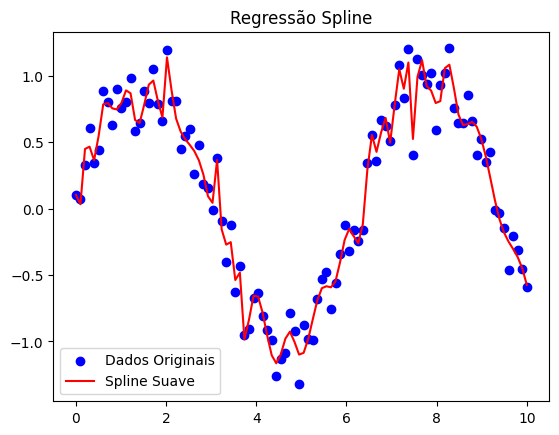

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Gerando dados
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, size=len(x))

# Ajustando uma spline suave
spline = UnivariateSpline(x, y, s=1)
y_spline = spline(x)

# Visualização
plt.scatter(x, y, color='blue', label='Dados Originais')
plt.plot(x, y_spline, color='red', label='Spline Suave')
plt.title('Regressão Spline')
plt.legend()
plt.show()

## 3. Regressão usando MLP (Multi-Layer Perceptron)
MLP é uma arquitetura de rede neural que pode ser utilizada para problemas de regressão, modelando relações complexas entre variáveis.

### Exemplo: Regressão com MLP

MSE no teste: 9.3020


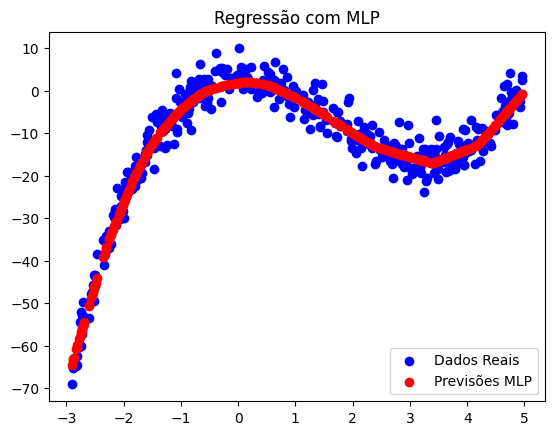

In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gerando dados
np.random.seed(42)
x = np.linspace(-3, 5, 2000)
y = x**3 - 5*x**2 + 2 + np.random.normal(0, 3, size=len(x))
x = x[:, np.newaxis]

# Divisão treino/teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ajustando o MLP
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

# Avaliação e visualização
print(f'MSE no teste: {mean_squared_error(y_test, y_pred):.4f}')
plt.scatter(x_test, y_test, color='blue', label='Dados Reais')
plt.scatter(x_test, y_pred, color='red', label='Previsões MLP')
plt.title('Regressão com MLP')
plt.legend()
plt.show()

---

## 4. Agrupamento usando Redes Neurais
Redes neurais baseadas em Mapas Auto-Organizáveis (Self-Organizing Maps - SOM) podem ser utilizadas para realizar agrupamentos de dados de maneira não supervisionada. 

### Exemplo: Agrupamento com SOM

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.01932621636236348
Tamanho original: 15129.00 KB
Tamanho comprimido: 5043.00 KB
A imagem comprimida é 33.33% do tamanho da original


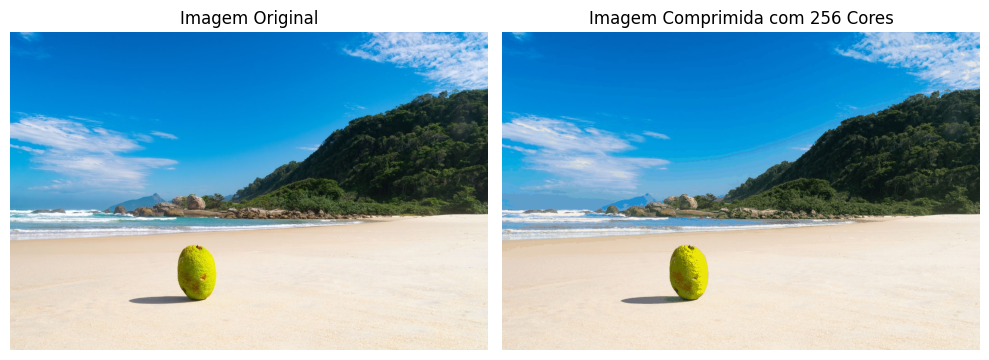

In [59]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import math

# Configurar parâmetros
# image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"  # URL da imagem
image_url = "https://s2-casavogue.glbimg.com/YKjCtR8d9N62JhaPVBJmR56qVY8=/0x0:4088x2725/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_d72fd4bf0af74c0c89d27a5a226dbbf8/internal_photos/bs/2024/e/l/wRWga5RLC7eiTW31N3xg/melhores-praias-do-brasil-praia-de-lopes-mendes.jpg"  # URL da imagem
#n_colors = 5  # Número de cores desejadas
mapa_x = 16
mapa_y = 16
n_colors = mapa_x * mapa_y 

# Carregar a imagem
def load_image_from_url(url):
    response = requests.get(url, stream=True)
    img = Image.open(response.raw).convert("RGB")
    return np.array(img)

# read the image
img = load_image_from_url(image_url)

# reshaping the pixels matrix
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
som = MiniSom(mapa_x, mapa_y, 3, sigma=1.,
              learning_rate=0.2, neighborhood_function='bubble')  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train(pixels, 100, random_order=True, verbose=True)

qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

# Comparar tamanhos
original_size_kb = len(pixels) * (3*8) / 1024  # (3 bytes por pixel, cada pixel são 8 bits)
compressed_size_kb = (len(pixels) * math.ceil(math.log2(n_colors))) / 1024  # Tamanho comprimido em kilobytes
compression_ratio = compressed_size_kb / original_size_kb

print(f"Tamanho original: {original_size_kb:.2f} KB")
print(f"Tamanho comprimido: {compressed_size_kb:.2f} KB")
print(f"A imagem comprimida é {compression_ratio:.2%} do tamanho da original")

# Exibir as imagens
plt.figure(figsize=(10, 5))

# Imagem original
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Imagem Original")
plt.axis("off")

# Imagem comprimida
plt.subplot(1, 2, 2)
plt.imshow(clustered)
plt.title(f"Imagem Comprimida com {n_colors} Cores")
plt.axis("off")

plt.tight_layout()
plt.show()
